In [255]:
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
def read_indata(path):
    '''
    :param path: a string of path saved the dataset
    :return: pandas datarame
    '''
    data = pd.read_csv(path)
    return data


## generate new column year for every data

def generate_year_month(df, colname):
    '''
    :param df: dataframe we want to add column year and month
    :param colname: a stirng column name in the dataframe saved the dateandtime
    :return: dataframe after adding the column
    '''
    df['year'] = pd.DatetimeIndex(df[colname]).year
    df['month'] = pd.DatetimeIndex(df[colname]).month
    #df['day'] = pd.DatetimeIndex(df[colname]).day

    #df['indextype'] = str(string)
    return df

In [5]:
def city_groupby(df, colname, city_name):
    '''This function mainly is used to process the AQI data.
    :param df: dataframe we want to divide base on city name
    :param colname: the column name in the dataframe saved the city name
    :param city_name: the specific city name 
    :return: dataframe after filter city and year from 2012 to 2018, group by year and month
    '''
    df = df[(df[colname].str.contains(city_name)) & (df.year>=2012) & (df.year<2018)]
    df = df.groupby(['year','month']).agg({'mean'})

    return df

In [513]:
def crime_count(df, date_colname,per):
    '''
    :param df: dataframe we want to count the number of crime
    :param colname: a string column name in the dataframe saved the date
    :return: dataframe after adding the column
    '''
    df['year'] = df[date_colname].str[6:10].astype(int)
    df['month'] = df[date_colname].str[0:2].astype(int)
    df['day'] =  df[date_colname].str[3:5].astype(int)
    df = df[(df.year>=2012) & (df.year<2018)]
    if per == 'month':
        df_per = df[[date_colname,'year', 'month']].groupby(['year', 'month']).count().rename(columns={date_colname:'count'})
    elif per == 'day':
        df_per = df[[date_colname,'year', 'month','day']].groupby(['year', 'month','day']).count().rename(columns={date_colname:'count'})
    elif per == 'type':
        df_per = df[[date_colname,'year', 'month','type']].groupby(['year', 'month','type']).count().rename(columns={date_colname:'count'})
    
    #df['indextype'] = str(string)
    return df_per

In [629]:
def crime_airpollution_plot(df, city_name):
    """This function is used to draw plot to show trend of crime and AQI
    
    """
    ax = df.plot(secondary_y=['AQI_mean'],grid=True,figsize=(15,5))
    ax.set_title(city_name+" Crime and AQI")
    ax.set_ylabel('crime_count')
    ax.grid(linestyle="--", alpha=3)
    ax.right_ax.set_ylabel('AQI_mean')
    plt.show()

In [394]:
def crime_type_count(crime_df, type_col): 
    """This function is mainly used to count the number of crime in different crime type
    
    :param crime_df: dataframe we want to count the number of crime type
    :param type_col: a string column name in the dataframe saved the crime type
    :return: dataframe after adding the column
    """
    crime_df['count']= 0
    type_count = crime_df[[type_col,'count']].groupby([type_col]).count()
    type_count = type_count.sort_values("count", ascending = False)
    return type_count

def crime_type_word_count(crime_df, type_colname): 
    crime_word = crime_df[type_colname].str.split('\s|,', expand=True)
    word_count = crime_word.stack().value_counts()
    return word_count

In [ ]:
def normalize_crime_type(crime_df, type_colname):
    crime_type = crime_df[[type_colname]].replace(regex=[r'^.*ASSAULT.*$', r'^.*BATTERY.*$',r'^.*INTIMATE.*$',r'^.*RAPE.*$',r'^.*KIDNAPPING.*$',r'^.*ASSLT.*$',  ], value='ASSAULT')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*OFF.*$',r'^.*MISCHIEF.*$', r'^.*HARRASSMENT.*$',r'^.*EXTORTION.*$',
                                                           r'^.*JOSTLING.*$',r'^.*OBSCENITY.*$',r'^.*STALK.*$',r'^.*INDECENT.*$',r'^.*PEEP.*$',
                                                           r'^.*INTIMIDATION.*$',r'^.*THREAT.*$'], value='OFFENSES')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*DAMAGE.*$', r'^.*VANDALISM.*$', r'^.*IMPAIRED.*$', r'^.*ARSON.*$', r'^.*WRECK.*$'], value='VANDALISM')
 

    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*BURGLAR.*$'], value='BURGLARY')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*ROBBERY.*$'], value='ROBBERY')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*THEFT.*$', r'^.*LARCENY.*$', r'^.*STOLEN.*$',r'^.*SNATCHING.*$',r'^.*PROWLER.*$',r'^.*PICKPOCKET.*$',], value='THEFT')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*DRUG.*$', r'^.*NARCOTIC.*$'], value='DRUG')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*VIOLATION.*$' ,r'^.*GAMBL.*$' ,r'^.*LEWD.*$' ,r'^.*ALCOHOL.*$' , 
                                                           r'^.*ESCAPE.*$' ,r'^.*RESIST.*$' ,r'^.*CONTEMPT.*$' ,r'^.*YIELD.*$' ,
                                                           r'^.*DISTURB.*$',r'^.*DISRUPT.*$', r'^.*PUB.*$',r'^.*DISORDER.*$',r'^.*SCARE.*$',
                                                           r'^.*WEAPON.*$', r'^.*SHOT.*$' ,r'^.*FIREARM.*$' ,
                                                           r'^.*LOITERING.*$', r'^.*UNAUTHORIZED.*$',r'^.*THROW.*$',r'^.*DUMP.*$',
                                                           r'^.*TRESPASS.*$',r'^.*DRIVING.*$',r'^.*TRAFFIC.*$'], value='VIOLATION')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*DECEPTIVE.*$' , r'^.*FRAUD.*$', r'^.*FORGERY.*$', r'^.*CONCEALED.*$',r'^.*COUNTERFEIT.*$'], value='DECEPTIVE')

    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*HOMICIDE.*$' , r'^.*MURDER.*$',r'^.*MANSLAUGHTER.*$'], value='HOMICIDE')
    
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*OTHER.*$' ,r'^.*ATTEMPT.*$' ,r'^.*NON.*$' ,r'^.*FALSE.*$' ,
                                                           r'^.*CHILD.*$' ,r'^.*CHL.*$' ,r'^.*ANIMAL.*$' ,r'^.*DOCUMENT.*$' ,
                                                           r'^.*SEX.*$' , r'^.*PIMP.*$' ,r'^.*PROSTITUTION.*$' ,r'^.*PANDER.*$' ,r'^.*COPULATION.*$' ,
                                                           r'^.*CODE.*$' , r'^.*LAW.*$', r'^.*MISCELLANEOUS.*$'], value='OTHERS')

    crime_df['type'] = crime_type
    return crime_df

In [3]:
airpollution=pd.DataFrame()
airpollution_dir = './daily_aqi_by_cbsa/daily_aqi_by_cbsa_'
for i in range(2012,2018):
    file=read_indata(airpollution_dir+str(i)+'.csv')
    airpollution=airpollution.append(file)
airpollution.head()

#extract columns that need to analyze
#airpollution = airpollution[['City', 'Date Local', 'NO2 Mean','NO2 AQI', 'O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']]

#extract columns that need to be analyzed
airpollution = airpollution[['CBSA', 'Date', 'AQI']]

airpollution.head()

,CBSA,Date,AQI
0,"Aberdeen, SD",2012-01-01,10
1,"Aberdeen, SD",2012-01-04,13
2,"Aberdeen, SD",2012-01-08,10
3,"Aberdeen, SD",2012-01-10,13
4,"Aberdeen, SD",2012-01-13,22


In [4]:
#generate year and month
airpollution = generate_year_month(airpollution, 'Date')
airpollution.head()

,CBSA,Date,AQI,year,month
0,"Aberdeen, SD",2012-01-01,10,2012,1
1,"Aberdeen, SD",2012-01-04,13,2012,1
2,"Aberdeen, SD",2012-01-08,10,2012,1
3,"Aberdeen, SD",2012-01-10,13,2012,1
4,"Aberdeen, SD",2012-01-13,22,2012,1


# Hypothesis 2: there exists a correlation between crime and air pollution.

## Chicago crime and air pollution

In [178]:
#extract Chicago data from air pollution file
Chicago_airpollution = city_groupby(airpollution, 'CBSA', 'Chicago')
Chicago_airpollution.head()


AQI
                 mean
year month           
2012 1      68.387097
     2      73.551724
     3      76.387097
     4      63.400000
     5      78.290323

In [179]:
#read Chicago crime data
Chicago_crime = read_indata('./Chicago_crime_2012-2017.csv')
Chicago_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11002368,JA329407,01/01/2012 12:00:00 AM,021XX N KENNETH AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,31.0,20.0,20,NaN,NaN,2012,11/27/2017 03:53:35 PM,NaN,NaN,NaN
1,9979416,HY169652,01/01/2012 12:00:00 AM,053XX W MONROE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,29.0,25.0,17,1140801.0,1899144.0,2012,02/09/2018 03:44:29 PM,41.879335,-87.758468,"(41.879335159, -87.758467514)"
2,10433124,HZ170983,01/01/2012 12:00:00 AM,026XX N MC VICKER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,True,False,...,29.0,19.0,17,NaN,NaN,2012,05/11/2016 03:48:18 PM,NaN,NaN,NaN
3,9888481,HX538405,01/01/2012 12:00:00 AM,066XX S MAY ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,17.0,68.0,11,1169793.0,1860812.0,2012,02/09/2018 03:44:29 PM,41.773566,-87.653128,"(41.773566189, -87.653127978)"
4,10593543,HZ344934,01/01/2012 12:00:00 AM,064XX W BELLE PLAINE AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,38.0,17.0,17,NaN,NaN,2012,07/12/2016 03:53:40 PM,NaN,NaN,NaN


In [180]:
#count the total number of crime each month from 2012-2017
Chicago_crime_per_month = crime_count(Chicago_crime, 'Date', 'month')
Chicago_crime_per_month.head()

count
year month       
2012 1      26265
     2      23869
     3      28561
     4      27178
     5      30088

In [380]:
#merge crime data and month data
Chicago_crime_airpollution = pd.merge(Chicago_airpollution, Chicago_crime_per_month,on=['year','month'])
Chicago_crime_airpollution.columns=['AQI_mean', 'crime_count']
Chicago_crime_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


AQI_mean  crime_count
year month                        
2012 1      68.387097        26265
     2      73.551724        23869
     3      76.387097        28561
     4      63.400000        27178
     5      78.290323        30088

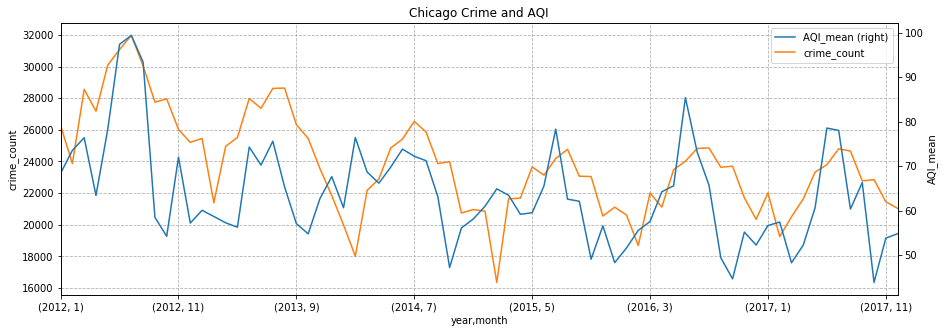

In [386]:
#draw a plot to show the trend of crime and AQI
crime_airpollution_plot(Chicago_crime_airpollution,'Chicago')

In [668]:
Chicago_crime_airpollution.corr() 

,AQI_mean,crime_count
AQI_mean,1.000000,0.553621
crime_count,0.553621,1.000000


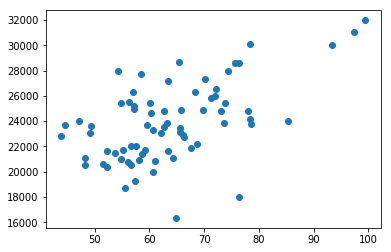

In [188]:

plt.scatter(Chicago_crime_airpollution.AQI_mean, Chicago_crime_airpollution.crime_count)

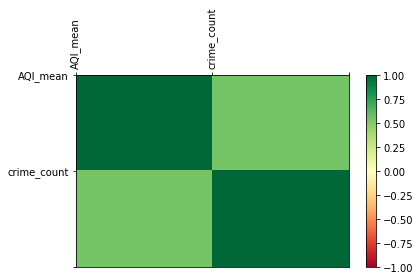

In [669]:
df_corr = Chicago_crime_airpollution.corr()
data = df_corr.values
 
fig = plt.figure()
ax = fig.add_subplot(111)
 
heatmap = ax.pcolor(data,cmap = plt.cm.RdYlGn)
fig.colorbar(heatmap)
ax.set_xticks(np.arange(data.shape[0] + 0.5),minor = False)
ax.set_yticks(np.arange(data.shape[1]  + 0.5),minor = False)
ax.invert_yaxis()
ax.xaxis.tick_top()
 
column_labels = df_corr.columns
row_labels = df_corr.index
 
ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)
 
plt.xticks(rotation = 90)
heatmap.set_clim(-1,1)
plt.tight_layout()
plt.show()
 

In [183]:
Chicago_crime_model = ols("crime_count ~ AQI_mean", data=Chicago_crime_airpollution).fit()
Chicago_crime_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            crime_count   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     30.94
Date:                Thu, 02 May 2019   Prob (F-statistic):           4.56e-07
Time:                        14:29:14   Log-Likelihood:                -667.16
No. Observations:                  72   AIC:                             1338.
Df Residuals:                      70   BIC:                             1343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.431e+04   1748.218      8.185      0.000    1.08e+04    1.78e+04
AQI_mean     149.9422     26.958      5.562      0.000      96.176     203.708
==============================================================================
Omnibus:                        3.974   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.135
Skew:                          -0.410   Prob(JB):                        0.209
Kurtosis:                       3.609   Cond. No.                         371.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Los Angeles crime and air pollution

In [112]:
#extract LA air pollution data
LA_airpollution = city_groupby(airpollution, 'CBSA', 'Los Angeles')
LA_airpollution.head()

AQI
                  mean
year month            
2012 1       77.354839
     2       65.896552
     3       63.774194
     4       78.433333
     5      111.741935

In [170]:
#read LA crime data
LA_crime = read_indata('./LA_Crime_Data_2010_to_Present.csv')
LA_crime.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,61000673,04/07/2016,04/07/2016,2043,10,West Valley,1037,886,DISTURBING THE PEACE,1501,...,NaN,IC,Invest Cont,886.0,NaN,NaN,NaN,17100 VANOWEN ST,NaN,"(34.1939, -118.5055)"
1,131609876,04/02/2016,04/01/2016,1900,19,Mission,1902,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,...,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,13600 DRONEFIELD AV,NaN,"(34.3196, -118.4561)"
2,150319258,08/20/2016,08/20/2016,30,3,Southwest,325,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,NaN,AO,Adult Other,440.0,NaN,NaN,NaN,2800 MENLO AV,NaN,"(34.0294, -118.2903)"
3,151601466,01/01/2016,01/01/2016,2040,16,Foothill,1642,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0334 0411 1402,...,OTHER KNIFE,AA,Adult Arrest,230.0,998.0,NaN,NaN,10500 CAYUGA AV,NaN,"(34.2606, -118.4238)"
4,151601467,01/02/2016,01/02/2016,30,16,Foothill,1668,624,BATTERY - SIMPLE ASSAULT,0416,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,9800 MARCUS AV,NaN,"(34.2463, -118.2818)"


In [187]:
#count the total number of crime in LA per month
LA_crime_per_month = crime_count(LA_crime, 'Date Occurred', 'month')
LA_crime_per_month.head()

count
year month       
2012 1      17745
     2      15316
     3      16562
     4      16275
     5      17466

In [381]:
#merge airpollution data with crime data
LA_crime_airpollution = pd.merge(LA_airpollution, LA_crime_per_month,on=['year','month'])
LA_crime_airpollution.columns=['AQI_mean', 'crime_count']
LA_crime_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


AQI_mean  crime_count
year month                         
2012 1       77.354839        17745
     2       65.896552        15316
     3       63.774194        16562
     4       78.433333        16275
     5      111.741935        17466

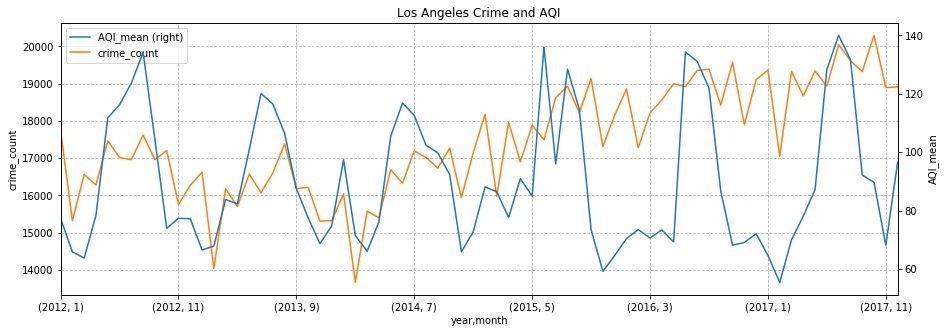

In [384]:
crime_airpollution_plot(LA_crime_airpollution,'Los Angeles')

In [670]:
LA_crime_airpollution.corr() 

,AQI_mean,crime_count
AQI_mean,1.000000,0.246539
crime_count,0.246539,1.000000


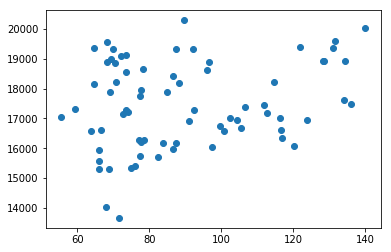

In [175]:
plt.scatter(LA_crime_airpollution.AQI_mean, LA_crime_airpollution.crime_count)

In [176]:
LA_crime_model = ols("crime_count ~ AQI_mean", data=LA_crime_airpollution).fit()
LA_crime_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            crime_count   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     4.530
Date:                Thu, 02 May 2019   Prob (F-statistic):             0.0368
Time:                        14:28:20   Log-Likelihood:                -623.86
No. Observations:                  72   AIC:                             1252.
Df Residuals:                      70   BIC:                             1256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.605e+04    687.062     23.354      0.000    1.47e+04    1.74e+04
AQI_mean      15.7572      7.403      2.128      0.037       0.992      30.523
==============================================================================
Omnibus:                        3.024   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                1.721
Skew:                          -0.043   Prob(JB):                        0.423
Kurtosis:                       2.248   Cond. No.                         380.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## New York crime and air pollution

In [122]:
#read nyc crime data
NYC_crime = read_indata('./NYPD_Complaint_Data_Historic.csv')
NYC_crime.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,236535100,04/20/2010,02:30:00,NaN,NaN,63.0,04/20/2010,578,HARRASSMENT 2,637.0,...,F,NaN,40.636303,-73.919049,"(40.636302737, -73.919048996)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F
1,125657244,04/20/2010,02:15:00,04/20/2010,02:20:00,115.0,04/20/2010,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.750832,-73.874087,"(40.750831801, -73.874087084)",PATROL BORO QUEENS NORTH,NaN,18-24,WHITE HISPANIC,M
2,108722085,04/20/2010,02:00:00,NaN,NaN,48.0,04/20/2010,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.849628,-73.887296,"(40.849628291, -73.887295663)",PATROL BORO BRONX,NaN,25-44,BLACK,F
3,798889672,04/20/2010,02:00:00,04/20/2010,06:30:00,75.0,04/20/2010,107,BURGLARY,213.0,...,NaN,NaN,40.676199,-73.884449,"(40.676198799, -73.884448642)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
4,390790746,04/20/2010,02:00:00,04/20/2010,09:30:00,113.0,04/20/2010,341,PETIT LARCENY,321.0,...,NaN,NaN,40.693635,-73.753149,"(40.693635482, -73.753148571)",PATROL BORO QUEENS SOUTH,NaN,45-64,UNKNOWN,M


In [123]:
#count the total number of crime in NYC per month
NYC_crime_per_month = crime_count(nyc_crime, 'RPT_DT', 'month')
NYC_crime_per_month.head()

count
year month       
2012 1      41569
     2      39248
     3      43539
     4      41721
     5      44949

In [124]:
#extract nyc airpollution data 
NYC_airpollution = city_groupby(airpollution, 'CBSA', 'New York')
NYC_airpollution.head()

AQI
                 mean
year month           
2012 1      61.000000
     2      56.965517
     3      54.935484
     4      57.000000
     5      65.451613

In [382]:
#merge air pollution data with  crime data
NYC_crime_airpollution = pd.merge(NYC_airpollution, NYC_crime_per_month,on=['year','month'])
NYC_crime_airpollution.columns=['AQI_mean', 'crime_count']
NYC_crime_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


AQI_mean  crime_count
year month                        
2012 1      61.000000        41569
     2      56.965517        39248
     3      54.935484        43539
     4      57.000000        41721
     5      65.451613        44949

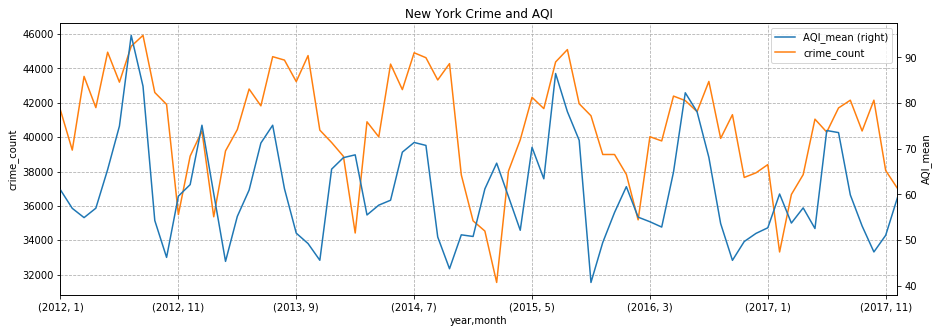

In [657]:
crime_airpollution_plot(NYC_crime_airpollution,'New York')

In [126]:
NYC_crime_airpollution.corr() 

,AQI_mean,crime_count
AQI_mean,1.000000,0.304485
crime_count,0.304485,1.000000


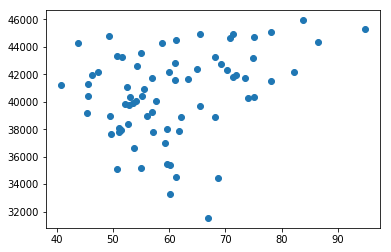

In [127]:
plt.scatter(NYC_crime_airpollution.AQI_mean, NYC_crime_airpollution.crime_count)

# Hypothesis 3: The change of airpollution would have different affect on different type of crime.

## Crime Type and Airpollution

Since the crime data from different city have different category. In order to create a general category that could be used in both three city, we calculate the frequency of word in each crime category column from three cities, choosing the most frequent word as a main category name and assign other category to the main category.

In [452]:
Chicago_crimetype_word_count = crime_type_word_count(Chicago_crime, 'Primary Type')
Chicago_crimetype_word_count.head(10)

THEFT           463603
BATTERY         311011
CRIMINAL        226693
DAMAGE          183242
NARCOTICS       147568
OFFENSE         124562
ASSAULT         118537
OTHER           104568
PRACTICE         97114
DECEPTIVE        97114
BURGLARY         95777
VEHICLE          71756
MOTOR            71756
ROBBERY          68580
TRESPASS         43413
VIOLATION        38678
PUBLIC           21881
WEAPONS          21766
PEACE            14572
INVOLVING        13935
CHILDREN         13935
SEXUAL            8675
CRIM              8675
PROSTITUTION      8339
OFFICER           7238
INTERFERENCE      7238
WITH              7238
SEX               6100
HOMICIDE          3320
ARSON             2643
dtype: int64

In [453]:
LA_crimetype_word_count = crime_type_word_count(LA_crime, 'Crime Code Description')
LA_crimetype_word_count.head(10)

-              1027659
ASSAULT         480755
&               461563
THEFT           453733
VEHICLE         418245
UNDER)          362916
                331038
BURGLARY        303756
SIMPLE          291183
PETTY           270039
($950           265504
FROM            264492
BATTERY         192003
STOLEN          186885
VANDALISM       185449
OF              163837
WEAPON          152922
PLAIN           140358
($400           129161
FELONY          122037
IDENTITY        119127
INTIMATE        119016
PARTNER         119016
MOTOR           111076
OVER            100581
VANDALISMS)     100359
CHURCH          100359
ALL             100359
AGGRAVATED       99759
WITH             96997
dtype: int64

In [454]:
NYC_crimetype_word_count = crime_type_word_count(NYC_crime, 'OFNS_DESC')
NYC_crimetype_word_count.head(10)

&                1649038
LARCENY          1617975
RELATED          1245785
PETIT             987329
ASSAULT           849113
OFFENSES          795294
OF                772101
2                 736247
HARRASSMENT       736247
CRIMINAL          676929
GRAND             630646
3                 624668
MISCHIEF          603249
DANGEROUS         532568
DRUGS             390204
AGNST             327526
SENSBLTY          327526
ORD               327526
OFF.              327526
PUB               327526
FELONY            229703
ROBBERY           227063
BURGLARY          216356
VEHICLE           204232
PENAL             151562
LAW               146505
MISCELLANEOUS     145514
WEAPONS           142367
AGAINST           132627
PUBLIC            117742
dtype: int64

In [421]:
#concat word count in crime type of three different cities to show the most frequent word
word_concat = pd.DataFrame(pd.concat([Chicago_crimetype_word_count, LA_crimetype_word_count,NYC_crimetype_word_count]).rename('count'))
word_concat = word_concat.groupby(word_concat.index).agg({'count':'sum'}).sort_values("count", ascending=False)
word_concat.head()

,count
&,2110601
LARCENY,1617975
ASSAULT,1448405
RELATED,1245785
-,1027697
PETIT,987329
CRIMINAL,959303
OF,935938
THEFT,920946
OFFENSES,795294


In [500]:
#clear words that are not relevant to crime type(punctuation, adj)
word_concat.drop(index=['&','-','OF','2','3','','($400','($950','UNDER)','($399','($950.01',
                        'WITH','AND','OVER','ALL','OR','FROM','OTHER','OVER)EXCPT','AGNST','AGAINST',
                        'PETIT','PETTY','SIMPLE','PLAIN','RELATED','GRAND','DANGEROUS','SENSBLTY',
                        'VEHICLE','MOTOR','CHURCH']).head(50)


In [ ]:
#normalize the crime category in each city
Chicago_crime_withtype = normalize_crime_type(Chicago_crime, 'Primary Type')
LA_crime_withtype = normalize_crime_type(LA_crime, 'Crime Code Description')
NYC_crime_withtype = normalize_crime_type(NYC_crime, 'OFNS_DESC')

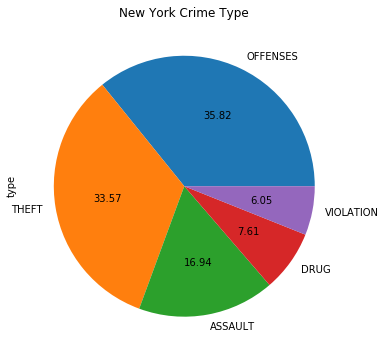

In [565]:
# count the number of crime in different crime type and show top 5
nyc_crime_type = NYC_crime_withtype['type'].value_counts().head(5)
nyc_crime_type.plot.pie(figsize=(6, 6),autopct='%.2f',title="New York Crime Type")

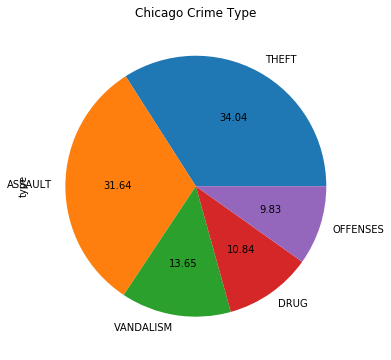

In [564]:
# count the number of crime in different crime type and show top 5
chi_crime_type = Chicago_crime_withtype['type'].value_counts().head(5)
chi_crime_type.plot.pie(figsize=(6, 6),autopct='%.2f',title="Chicago Crime Type")

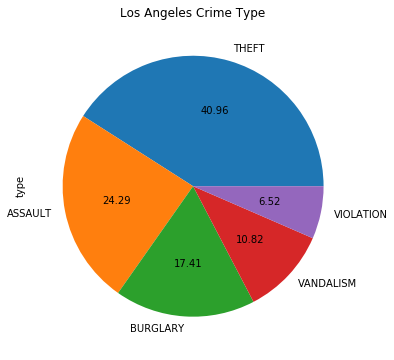

In [563]:
# count the number of crime in different crime type and show top 5
la_crime_type = LA_crime_withtype['type'].value_counts().head(5)
la_crime_type.plot.pie(figsize=(6, 6),autopct='%.2f',title="Los Angeles Crime Type")

In [633]:

Chicago_crime_per_type = crime_count(Chicago_crime_withtype, 'Date', 'type').unstack(level=2).fillna(0)
Chicago_crime_per_type.head()

count                                                            \
type       ASSAULT BURGLARY DECEPTIVE  DRUG HOMICIDE OFFENSES OTHERS ROBBERY   
year month                                                                     
2012 1        5747     1757      1125  3271       40     2039    194    1011   
     2        5402     1398      1002  3581       27     1909    198     696   
     3        7252     1638      1081  3542       53     1950    267     845   
     4        6453     1646      1082  3027       39     1825    173     975   
     5        7917     1924      1079  3068       50     1957    137    1267   

                                      
type       THEFT VANDALISM VIOLATION  
year month                            
2012 1      7153      2699      1229  
     2      6038      2373      1245  
     3      7292      3184      1457  
     4      7525      3129      1304  
     5      7928      3313      1448

In [635]:
Chicago_crimetype_airpollution = pd.merge(Chicago_crime_per_type,Chicago_airpollution,on=['year','month'])
Chicago_crimetype_airpollution.corr().tail(1)

count                                                    \
type       ASSAULT  BURGLARY DECEPTIVE      DRUG  HOMICIDE  OFFENSES   
    type                                                               
AQI mean  0.575547  0.383331 -0.320622  0.421797  0.140627  0.303527   

                                                           AQI  
type        OTHERS   ROBBERY    THEFT VANDALISM VIOLATION mean  
    type                                                        
AQI mean  0.443828  0.155589  0.43065  0.430494  0.524237  1.0

In [650]:
Chicago_crimetype_airpollution = pd.merge(Chicago_crime_per_type['count'][['THEFT', 'ASSAULT','VANDALISM']],Chicago_airpollution,on=['year','month'])
Chicago_crimetype_airpollution.columns=['THEFT', 'ASSAULT','VANDALISM','AQI_mean']
Chicago_crimetype_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


THEFT  ASSAULT  VANDALISM   AQI_mean
year month                                      
2012 1       7153     5747       2699  68.387097
     2       6038     5402       2373  73.551724
     3       7292     7252       3184  76.387097
     4       7525     6453       3129  63.400000
     5       7928     7917       3313  78.290323

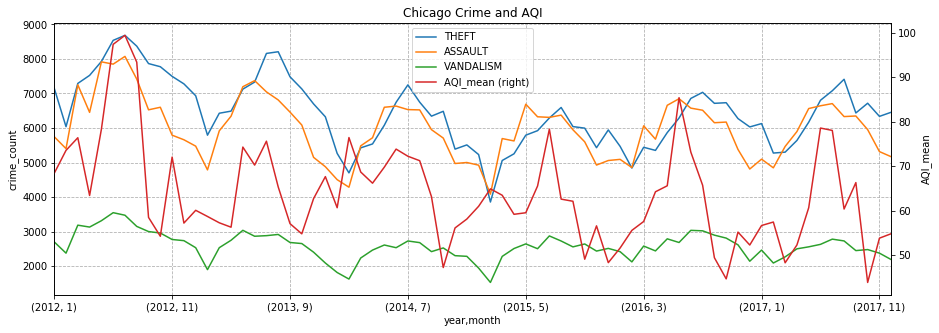

In [651]:
crime_airpollution_plot(Chicago_crimetype_airpollution,'Chicago')

In [661]:
LA_crime_per_type = crime_count(LA_crime_withtype, 'Date Occurred', 'type').unstack(level=2).fillna(0)
LA_crime_per_type.head()

count                      \
type            ABORTION/ILLEGAL   ASSAULT    BIGAMY   
      type                                             
count VIOLATION        -0.056599  0.856428 -0.179087   

                                                                               \
type            BLOCKING DOOR INDUCTION CENTER   BRIBERY  BURGLARY CONSPIRACY   
      type                                                                      
count VIOLATION                       0.237526 -0.095215  0.502016   0.223193   

                                                                          ...  \
type            CONTRIBUTING DECEPTIVE DOCUMENT WORTHLESS ($200 & UNDER)  ...   
      type                                                                ...   
count VIOLATION    -0.040291  0.036502                          0.409689  ...   

                                                                         \
type             HOMICIDE INCITING A RIOT  LYNCHING  OFFENSES    OTHERS   
      type                                                                
count VIOLATION  0.219345        0.008968 -0.147417  0.042536 -0.337438   

                                                                               \
type              ROBBERY     THEFT TILL TAP - PETTY ($950 & UNDER) VANDALISM   
      type                                                                      
count VIOLATION  0.857391  0.780624                        0.336445  0.902699   

                           
type            VIOLATION  
      type                 
count VIOLATION       1.0  

[1 rows x 24 columns]

In [665]:
LA_crimetype_airpollution = pd.merge(LA_crime_per_type,LA_airpollution,on=['year','month'])
LA_crimetype_airpollution.corr().tail(1)

count                                                     \
type     ABORTION/ILLEGAL   ASSAULT    BIGAMY BLOCKING DOOR INDUCTION CENTER   
    type                                                                       
AQI mean        -0.032441  0.454033  0.050907                       0.035983   

                                                                \
type       BRIBERY  BURGLARY CONSPIRACY CONTRIBUTING DECEPTIVE   
    type                                                         
AQI mean -0.046762 -0.072177  -0.048914     -0.08389 -0.176413   

                                            ...                            \
type     DOCUMENT WORTHLESS ($200 & UNDER)  ... INCITING A RIOT  LYNCHING   
    type                                    ...                             
AQI mean                          0.275937  ...        0.115424 -0.064177   

                                                  \
type      OFFENSES    OTHERS   ROBBERY     THEFT   
    type                                           
AQI mean  0.485515  0.104896  0.232779  0.045826   

                                                              AQI  
type     TILL TAP - PETTY ($950 & UNDER) VANDALISM VIOLATION mean  
    type                                                           
AQI mean                        0.050399  0.313516  0.239837  1.0  

[1 rows x 25 columns]

In [664]:
LA_crimetype_airpollution = pd.merge(LA_crime_per_type['count'][['THEFT', 'ASSAULT','BURGLARY']],LA_airpollution,on=['year','month'])
LA_crimetype_airpollution.columns=['THEFT', 'ASSAULT','BURGLARY','AQI_mean']
LA_crimetype_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


THEFT  ASSAULT  BURGLARY    AQI_mean
year month                                       
2012 1      6741.0   3312.0    3040.0   77.354839
     2      5643.0   3101.0    2480.0   65.896552
     3      5921.0   3395.0    2720.0   63.774194
     4      5809.0   3451.0    2616.0   78.433333
     5      6107.0   3932.0    2782.0  111.741935

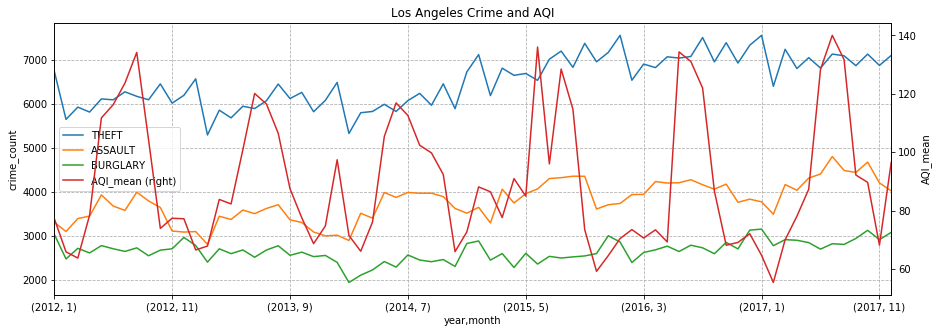

In [656]:
crime_airpollution_plot(LA_crimetype_airpollution,'Los Angeles')

In [666]:
NYC_crime_per_type = crime_count(NYC_crime_withtype, 'RPT_DT', 'type').unstack(level=2).fillna(0)
NYC_crime_per_type.head()

count                                                          \
type       ABORTION ASSAULT BURGLARY DECEPTIVE    DRUG ENDAN WELFARE INCOMP   
year month                                                                    
2012 1          0.0  5547.0   1674.0     656.0  3325.0                  1.0   
     2          0.0  5581.0   1375.0     761.0  3151.0                  2.0   
     3          0.0  6528.0   1395.0     777.0  3369.0                  0.0   
     4          0.0  6383.0   1432.0     754.0  3004.0                  4.0   
     5          0.0  7035.0   1643.0     719.0  3182.0                  3.0   

                                                                       \
type       FORTUNE TELLING HOMICIDE OFFENSES  OTHERS ROBBERY    THEFT   
year month                                                              
2012 1                 0.0     37.0  12500.0  1614.0  1736.0  11309.0   
     2                 0.0     30.0  11550.0  1554.0  1360.0  10700.0   
     3                 0.0     40.0  13268.0  1823.0  1478.0  11659.0   
     4                 0.0     37.0  12525.0  1716.0  1475.0  11344.0   
     5                 0.0     37.0  13215.0  1801.0  1741.0  12558.0   

                                
type       VANDALISM VIOLATION  
year month                      
2012 1         634.0    2398.0  
     2         675.0    2362.0  
     3         712.0    2319.0  
     4         695.0    2198.0  
     5         638.0    2210.0

In [667]:
NYC_crimetype_airpollution = pd.merge(NYC_crime_per_type,NYC_airpollution,on=['year','month'])
NYC_crimetype_airpollution.corr().tail(1)

count                                          \
type      ABORTION   ASSAULT  BURGLARY DECEPTIVE      DRUG   
    type                                                     
AQI mean  0.066032  0.476716  0.176417 -0.217365  0.122562   

                                                                             \
type     ENDAN WELFARE INCOMP FORTUNE TELLING  HOMICIDE  OFFENSES    OTHERS   
    type                                                                      
AQI mean             0.113541        0.408376  0.386428  0.240208  0.205929   

                                                 AQI  
type       ROBBERY    THEFT VANDALISM VIOLATION mean  
    type                                              
AQI mean  0.206553  0.23381 -0.070091  0.076991  1.0

In [659]:
NYC_crimetype_airpollution = pd.merge(NYC_crime_per_type['count'][['THEFT', 'ASSAULT','OFFENSES']],NYC_airpollution,on=['year','month'])
NYC_crimetype_airpollution.columns=['THEFT', 'ASSAULT','OFFENSES','AQI_mean']
NYC_crimetype_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


THEFT  ASSAULT  OFFENSES   AQI_mean
year month                                       
2012 1      11309.0   5547.0   12500.0  61.000000
     2      10700.0   5581.0   11550.0  56.965517
     3      11659.0   6528.0   13268.0  54.935484
     4      11344.0   6383.0   12525.0  57.000000
     5      12558.0   7035.0   13215.0  65.451613

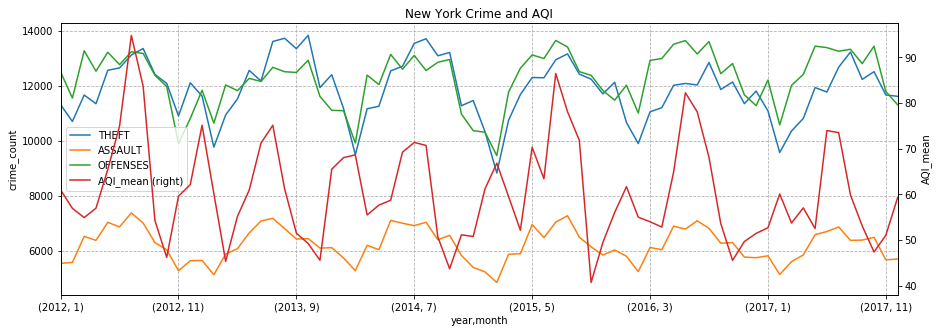

In [660]:
crime_airpollution_plot(NYC_crimetype_airpollution,'New York')